## Deep Learning and Computer Vision

### Training a perceptron

Shani Israelov

Jean Monnet University, 2023

In this exercise, the aim is to code and train a single neuron network on a binary classification
problem.
We have 1000 samples for each category, distributed in a 2D space as illustrated in the figure below.
You have to start from the provided code that draws the data from two Gaussian distribution.

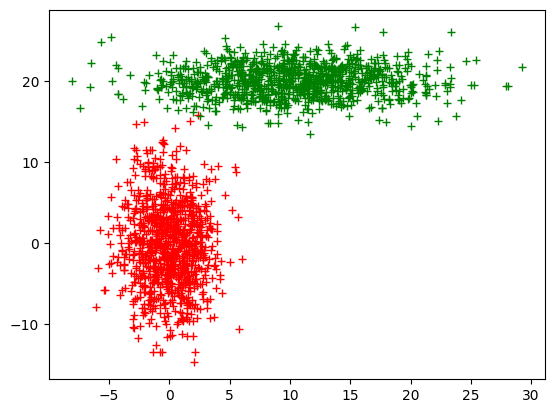

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N=1000

a=np.random.normal((0,0), (2,5), (N,2))
b=np.random.normal((10,20), (6,2), (N,2))

# Plot
plt.plot(a[:,0],a[:,1],'r+')
plt.plot(b[:,0],b[:,1],'g+')

plt.show()

1/ Create a data numpy array containing the (shuffled) 2000 points with their labels (1 or 0).


In [12]:
ay = a[:,2] # 0 red
by = b[:,2] # 1 green

2/ Create one function that makes the prediction from one point (2D) and one weight vector (3D).
The activation function is a step function with threshold at 0. For testing, you can just put random
values in the weight vector

[1.] [[-1.39102069  0.22059819]]


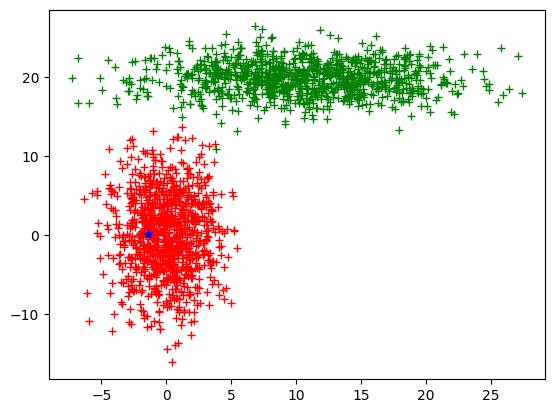

In [16]:
M = 3
weights = np.random.rand(1,M)
data_sample = np.random.normal((0,0), (2,5), (1,2))

# first function, weights is 1, M shape and data sample is 1, 2 shape, y is 1, shape
def single_prceptron(weights, data_sample):
    bias = 1
    data_sample = np.insert(data_sample, 0, bias)
    result = weights@data_sample
    y_prediction = np.heaviside(result, 1)
    return y_prediction

y_prediction = single_prceptron(weights, data_sample)
print(y_prediction, data_sample)

# Plot
plt.plot(a[:,0],a[:,1],'r+')
plt.plot(b[:,0],b[:,1],'g+')
plt.plot(data_sample[:,0],data_sample[:,1],'b*')
plt.show()

3/ Create a second function that updates the weights from the current weight vector and one point
(2D vector + label). The learning rate is also one input of the function. Use the update rule for a
perceptron, studied in class.

In [29]:
# second function
def update_rule(weights, data_sample, true_ground, learning_rate):
    y_pred = single_prceptron(weights, data_sample)
    bias = 1
    data_sample = np.insert(data_sample, 0, bias)
    weights = weights + learning_rate * (true_ground - y_pred) * data_sample
    return weights

y_pred_arr = np.array([])
learning_rate = 0.1
for i in range(len(a)):
    print("iteration num:", i, "current weights: ", weights)
    data_sample = a[i,0:2]
    true_ground = ay[i]
    weights = update_rule(weights, data_sample, true_ground, learning_rate)




iteration num: 0 current weights:  [[0.34296407 0.1726939  0.90752444]]
iteration num: 1 current weights:  [[0.34296407 0.1726939  0.90752444]]
iteration num: 2 current weights:  [[0.24296407 0.12365982 0.94811982]]
iteration num: 3 current weights:  [[ 0.14296407 -0.16011578  0.53103498]]
iteration num: 4 current weights:  [[ 0.04296407 -0.11363134  0.48155827]]
iteration num: 5 current weights:  [[ 0.04296407 -0.11363134  0.48155827]]
iteration num: 6 current weights:  [[-0.05703593 -0.33374434  0.33545675]]
iteration num: 7 current weights:  [[-0.05703593 -0.33374434  0.33545675]]
iteration num: 8 current weights:  [[-0.05703593 -0.33374434  0.33545675]]
iteration num: 9 current weights:  [[-0.05703593 -0.33374434  0.33545675]]
iteration num: 10 current weights:  [[-0.15703593 -0.05307538 -0.26484755]]
iteration num: 11 current weights:  [[-0.15703593 -0.05307538 -0.26484755]]
iteration num: 12 current weights:  [[-0.25703593 -0.13395052  0.16539896]]
iteration num: 13 current weigh

##### Self note:
Let's suppose that our unit is a classical perceptron, i.e. our activation function is the sign function. Then we can update the weights using the "perceptron learning rule". Suppose that x is a feature vector, y is the correct class label, and y' is the class label that was computed using our current weights. Then our update rule is:

If y' = y, do nothing.
Otherwise wi=wi+α∗y∗xi
The "learning rate" constant α
 controls how quickly the update process changes in response to new data.

There's several variants of this equation, e.g.

wi=wi+α∗(y−y′)∗xi
When trying to understand why they are equivalent, notice that the only possible values for y and y' are 1 and -1. So if y=y′
, then (y−y′)
 is zero and our update rule does nothing. Otherwise, (y−y′)
 is equal to either 2 or -2, with the sign matching that of the correct answer (y). The factor of 2 is irrelevant, because we can tune α
 to whatever we wish.

from: https://courses.grainger.illinois.edu/cs440/fa2019/Lectures/lect26.html


4/ Train the network on the training data for several epochs.


In [49]:
max_epocs_num = 6
epsilon = 1e-4
epoc_num = 0
weights_diff = 100
weights = np.random.rand(1,M)

while (epoc_num < max_epocs_num) or (weights_diff > epsilon):
    for i in range(len(a)):
        j = np.random.randint(0, len(a))	
        data_sample = a[j,0:2]
        true_ground = ay[j]
        new_weights = update_rule(weights, data_sample, true_ground, learning_rate)
        weights_diff = max(max(abs(new_weights-weights)))
        weights = new_weights
    print("epoc num:", epoc_num, "weight:", weights)
    epoc_num = epoc_num + 1


epoc num: 0 weight: [[-0.7477131   0.02552889  0.00687391]]
epoc num: 1 weight: [[-0.7477131   0.02552889  0.00687391]]
epoc num: 2 weight: [[-0.7477131   0.02552889  0.00687391]]
epoc num: 3 weight: [[-0.7477131   0.02552889  0.00687391]]
epoc num: 4 weight: [[-0.7477131   0.02552889  0.00687391]]
epoc num: 5 weight: [[-0.7477131   0.02552889  0.00687391]]


This training procedure will converge if
data are linearly separable or
we throttle the size of the updates as training proceeds by decreasing α
Apparently convergence is guaranteed if the learning rate is proportional to 1t
 where t is the current iteration number. The book recommends a gentler formula: make α
 proportional to 1000/1000+t
.
Processing the training data
One run through training data through the update rule is called an "epoch." One generally uses multiple epochs, i.e. the algorithm sees each training pair several times.

Datasets often have strong local correlations, because they have been formed by concatenating sets of data (e.g. documents) that each have a strong topic focus. So it's often best to process the individual training examples in a random order.

from: https://courses.grainger.illinois.edu/cs440/fa2019/Lectures/lect26.html


5/ Check the train accuracy after each epoch.

6/ Draw the learned linear separator in the 2D space.


7/ Test the trained perceptron on test data. This test data can be drawn with the same Gaussian
distributions used to draw the training set.